In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression


In [4]:
df = pd.read_csv("./Fuel_Consumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<font size=7>1.</font>

**<font size=5>Exploration Data</font>**

**Duplicate data**

* Kiểm tra dữ liệu duplicate dựa trên 1 vài thuộc tính 

In [5]:
prop = ['MODELYEAR','MAKE','MODEL','VEHICLECLASS','ENGINESIZE','CYLINDERS','TRANSMISSION']
df_dup = df[df.duplicated(subset=prop)]
df_dup.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
145,2014,BUICK,LACROSSE,MID-SIZE,3.6,6,AS6,E,18.4,12.2,15.6,18,250
147,2014,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,AS6,E,19.4,13.0,16.5,17,264
180,2014,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,A6,E,23.3,16.1,20.1,14,322
182,2014,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,A6,E,25.7,17.8,22.1,13,354
206,2014,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,A6,E,18.8,13.1,16.2,17,259


**Nhận xét**: Ta thấy có rất nhiều hàng có trùng các thuộc tính trên nhưng với các thuộc tính còn lại sẽ có sự khác nhau, nên sẽ không xử lý loại bỏ dữ liệu duplicate vì sẽ làm mất dữ liệu

* Kiếm tra dữ liệu duplicate dựa trên tất cả các thuộc tính

In [6]:

df_dup_1 = df[df.duplicated()]
df_dup_1.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS


**Nhận xét**: Không có dòng nào thỏa mãn trùng lắp

**Missing value**

* Kiếm tra missing value

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


**Nhận xét**: Ta thấy được dữ liệu có 1067 entries và tất cả các thuộc tính của dữ liệu đều có 1067 non-null giá trị. nên không cần xử lý missing value

**Outlier**

* Vẽ boxplot cho từng thuộc tính

Text(0.5, 1.0, 'CO2EMISSIONS')

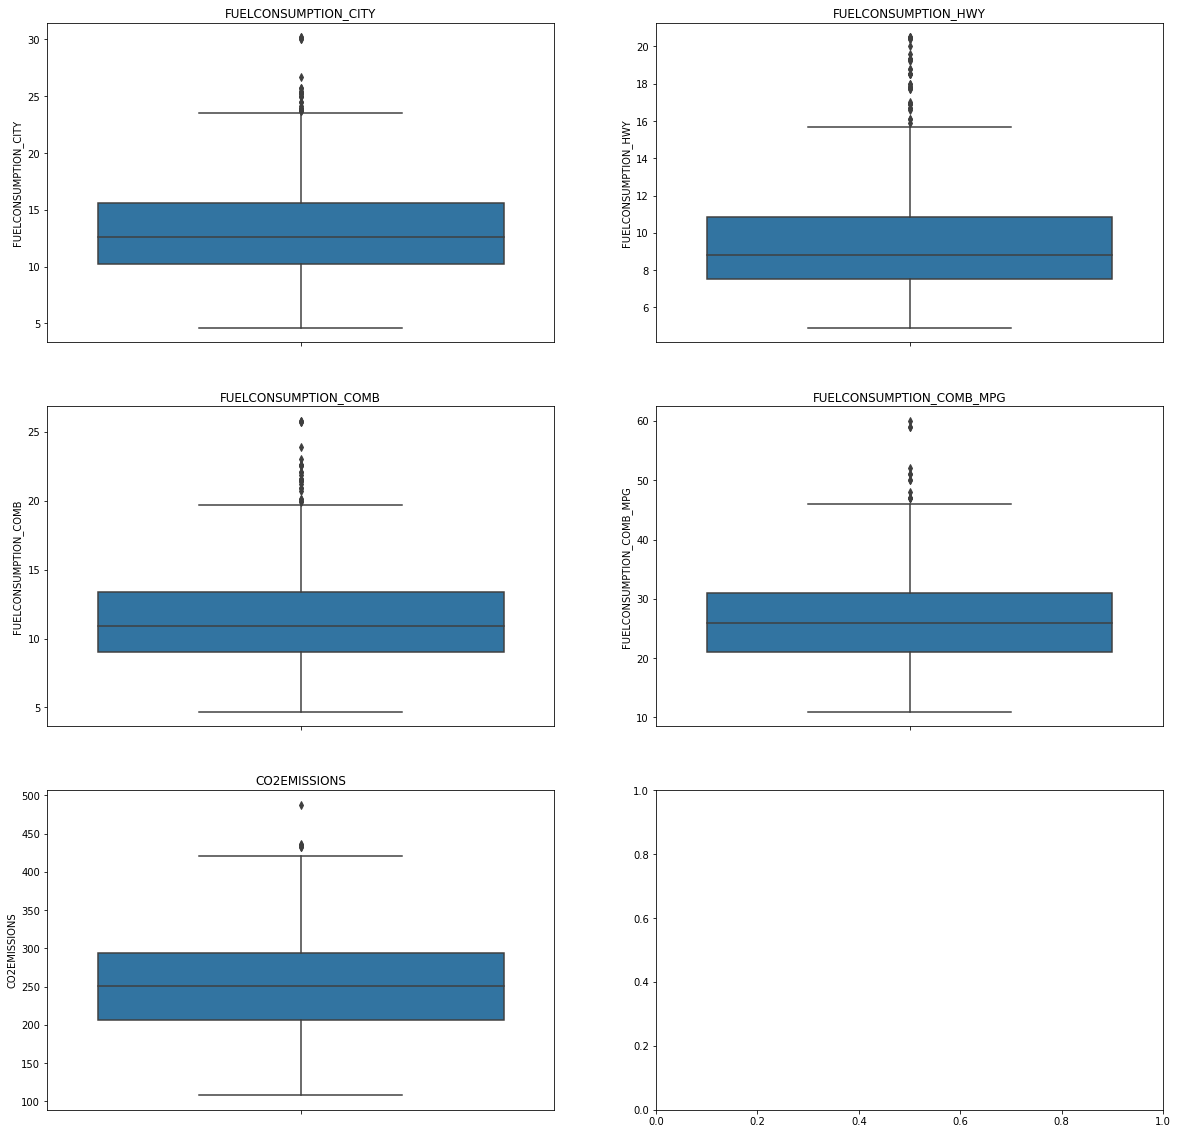

In [20]:
cols = ['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG','CO2EMISSIONS']
fig, axs = plt.subplots(3, 2, figsize=(20, 20))

sns.boxplot(y=df['FUELCONSUMPTION_CITY'], ax=axs[0,0])
axs[0,0].set_title("FUELCONSUMPTION_CITY")
sns.boxplot(y=df['FUELCONSUMPTION_HWY'], ax=axs[0,1])
axs[0,1].set_title("FUELCONSUMPTION_HWY")
sns.boxplot(y=df['FUELCONSUMPTION_COMB'], ax=axs[1,0])
axs[1,0].set_title("FUELCONSUMPTION_COMB")
sns.boxplot(y=df['FUELCONSUMPTION_COMB_MPG'], ax=axs[1,1])
axs[1,1].set_title("FUELCONSUMPTION_COMB_MPG")
sns.boxplot(y=df['CO2EMISSIONS'], ax=axs[2,0])
axs[2,0].set_title("CO2EMISSIONS")



**Nhận xét**: Với các cột dữ liệu `FUELCONSUMPTION_CITY`,`FUELCONSUMPTION_HWY`,`FUELCONSUMPTION_COMB`,`FUELCONSUMPTION_COMB_MPG` có nhiều outlier thì có thể tiến hành xử lý. `CO2EMISSIONS` có ít outlier nên không cần xử lý <br>
* Với số liệu của các cột `FUELCONSUMPTION_CITY`,`FUELCONSUMPTION_HWY`,`FUELCONSUMPTION_COMB` dao động từ 8 đến <20. Còn 
`FUELCONSUMPTION_COMB_MPG` thì có giá trị dao động từ 20 đến 30

**Visualization**

* Lựa chọn histogram để trực quan 1 vài thuộc tính của dữ liệu vì có độ liên tục

Text(0.5, 0, 'CO2 Emissions')

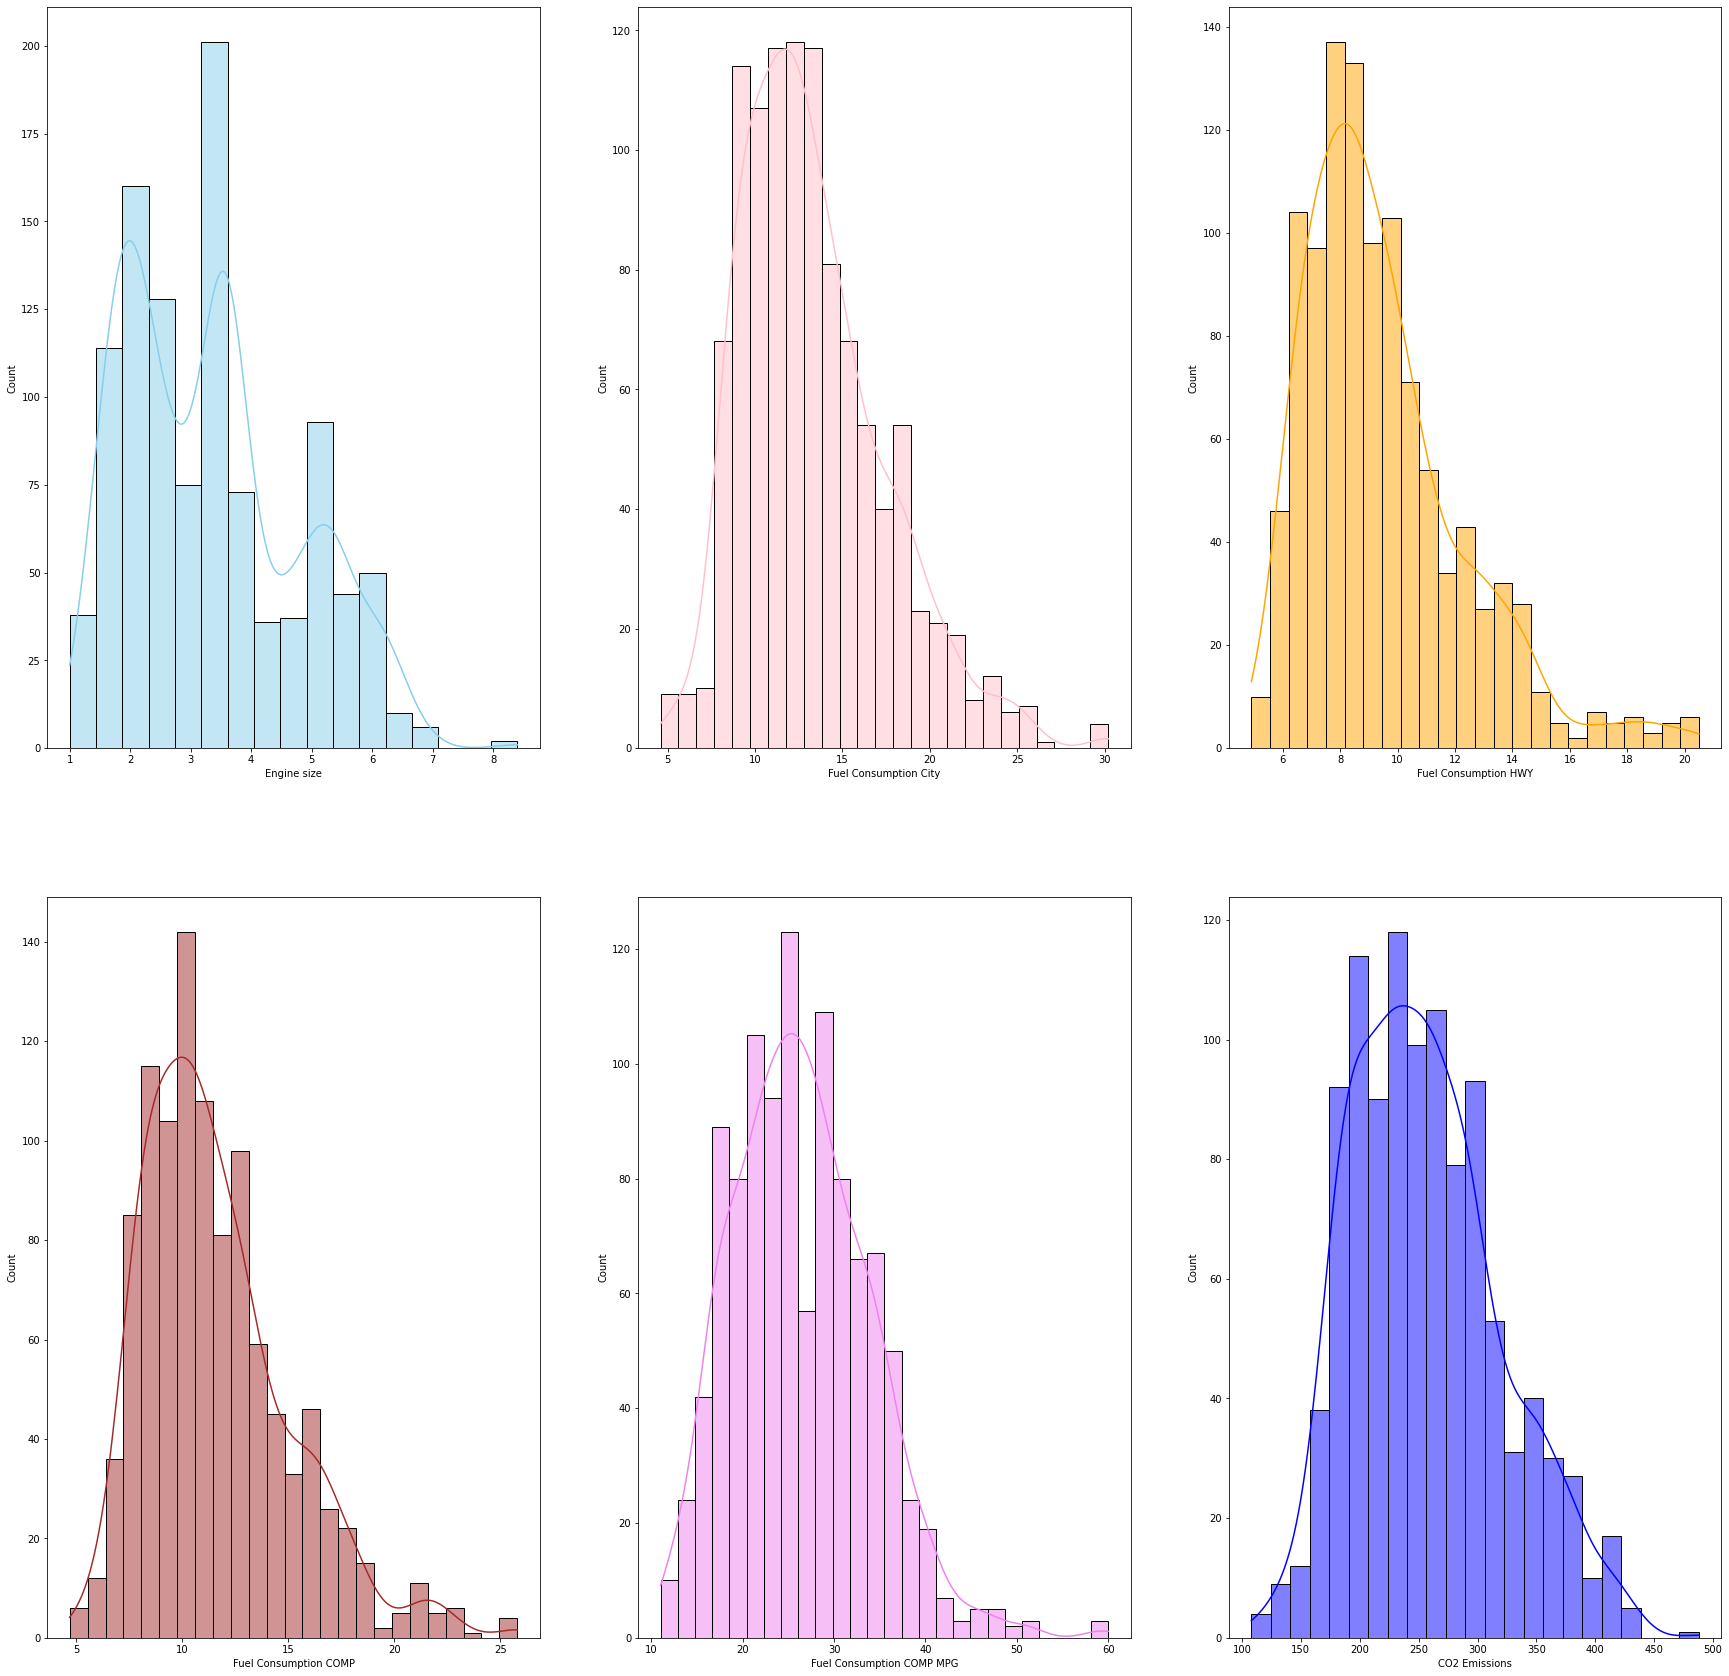

In [34]:
fig, axs = plt.subplots(2, 3, figsize=(30, 30))
sns.histplot(data=df, x="ENGINESIZE", kde=True, color="skyblue", ax=axs[0,0]).set_xlabel("Engine size")
sns.histplot(data=df, x="FUELCONSUMPTION_CITY", kde=True, color="pink", ax=axs[0,1]).set_xlabel("Fuel Consumption City")
sns.histplot(data=df, x="FUELCONSUMPTION_HWY", kde=True, color="orange", ax=axs[0,2]).set_xlabel("Fuel Consumption HWY")
sns.histplot(data=df, x="FUELCONSUMPTION_COMB", kde=True, color="brown", ax=axs[1,0]).set_xlabel("Fuel Consumption COMP")
sns.histplot(data=df, x="FUELCONSUMPTION_COMB_MPG", kde=True, color="violet", ax=axs[1,1]).set_xlabel("Fuel Consumption COMP MPG")
sns.histplot(data=df, x="CO2EMISSIONS", kde=True, color="blue", ax=axs[1,2]).set_xlabel("CO2 Emissions")

**Nhận xét**: 

* Vẽ barchart xem số lượng xe của mỗi `Vehicle Class`

<AxesSubplot:xlabel='VEHICLECLASS', ylabel='COUNT'>

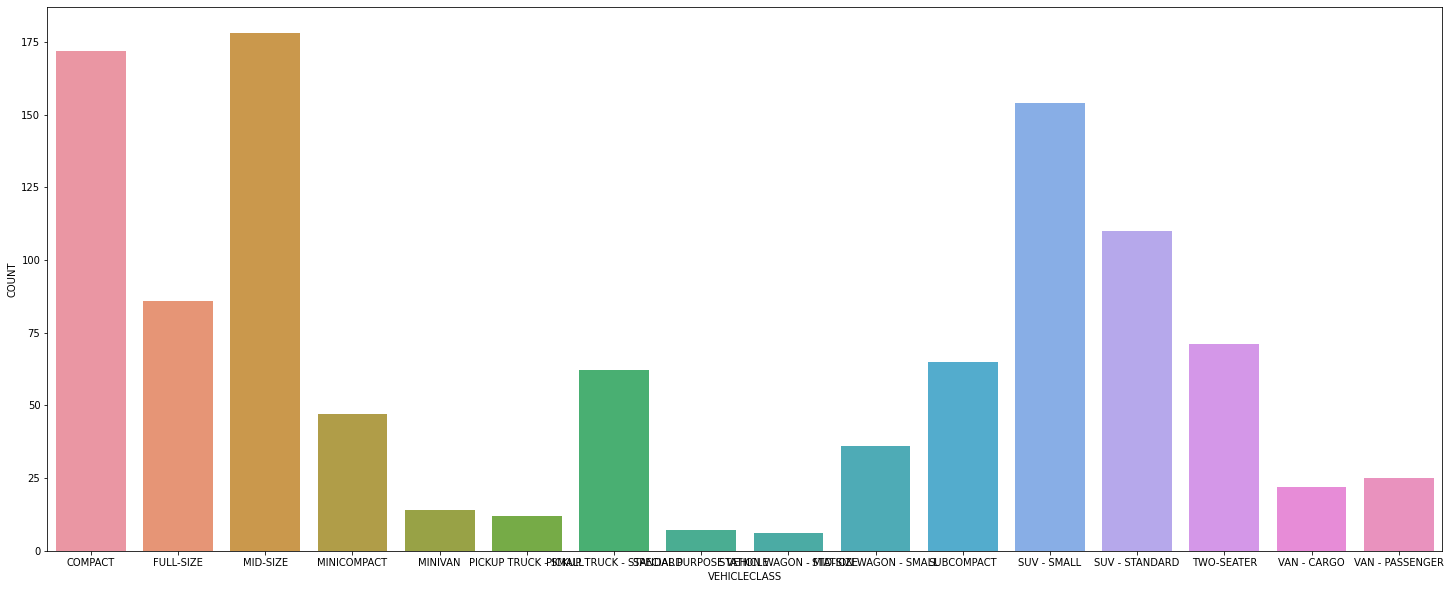

In [43]:
df_class = df.groupby('VEHICLECLASS')['MAKE'].count().reset_index()
df_class.rename(columns={'MAKE':'COUNT'}, inplace=True)
fig = plt.figure(figsize=(25,10))
sns.barplot(data=df_class, x="VEHICLECLASS",y="COUNT")



In [44]:
df_class

,VEHICLECLASS,COUNT
0,COMPACT,172
1,FULL-SIZE,86
2,MID-SIZE,178
3,MINICOMPACT,47
4,MINIVAN,14
5,PICKUP TRUCK - SMALL,12
6,PICKUP TRUCK - STANDARD,62
7,SPECIAL PURPOSE VEHICLE,7
8,STATION WAGON - MID-SIZE,6
9,STATION WAGON - SMALL,36


**Nhận xét**: 
* Dòng xe ***MID SIZE*** và ***COMPACT*** có số lượng gần bằng nhau, cho thấy xu hướng thị trường 2014 có thể đang hướng dễ sử dụng dòng xe này
* Dòng xe ***STATION WAGON - MID-SIZE*** và ***SPECIAL PURPOSE VEHICLE*** có số lượng thấp nhất

* Vẽ barchart xem số lượng xe của mỗi loai `CYLINDERS`

<AxesSubplot:xlabel='CYLINDERS', ylabel='COUNT'>

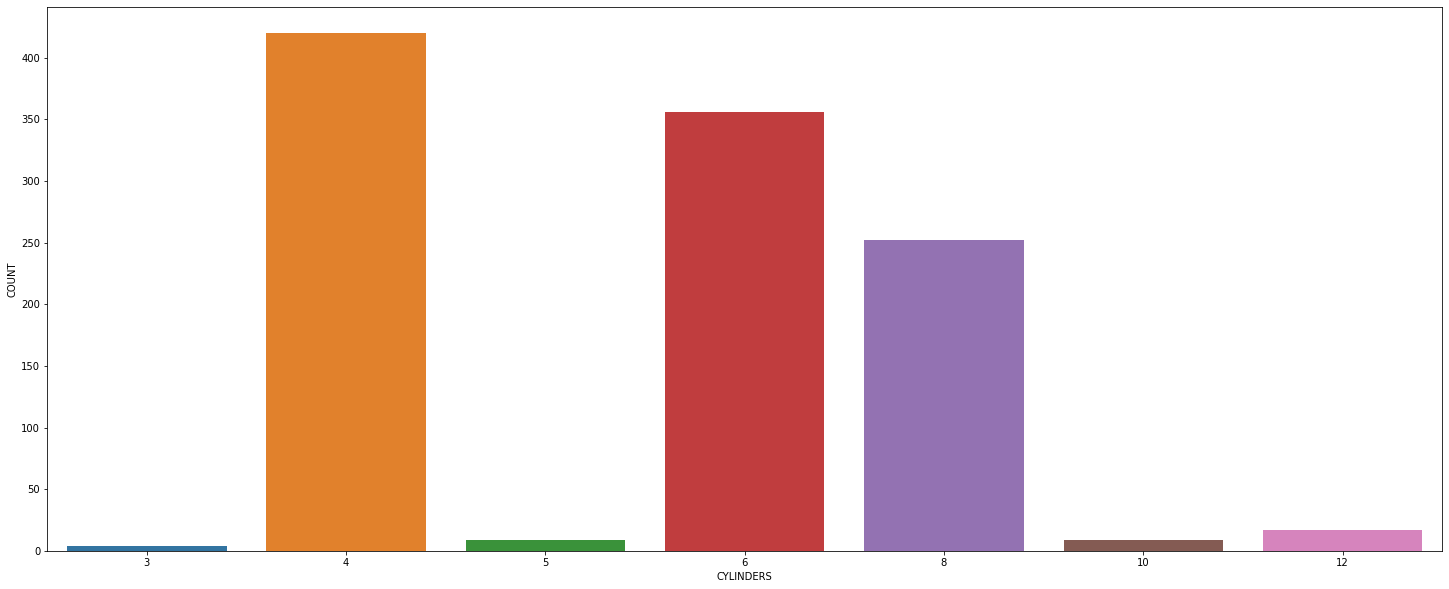

In [45]:
df_class_1= df.groupby('CYLINDERS')['MAKE'].count().reset_index()
df_class_1.rename(columns={'MAKE':'COUNT'}, inplace=True)
fig = plt.figure(figsize=(25,10))
sns.barplot(data=df_class_1, x="CYLINDERS",y="COUNT")

In [46]:
df_class_1

,CYLINDERS,COUNT
0,3,4
1,4,420
2,5,9
3,6,356
4,8,252
5,10,9
6,12,17


**Nhận xét**: Các mẫu xe sử dụng động cơ 4 cylinders là nhiều nhất, đứng thứ 2 là 6 cylinders

<font size=7>2.</font>

**<font size=5>Vẽ Heatmap</font>**

In [50]:
df_heat = df.drop('MODELYEAR', axis=1)
df_heat.head()

,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


<AxesSubplot:>

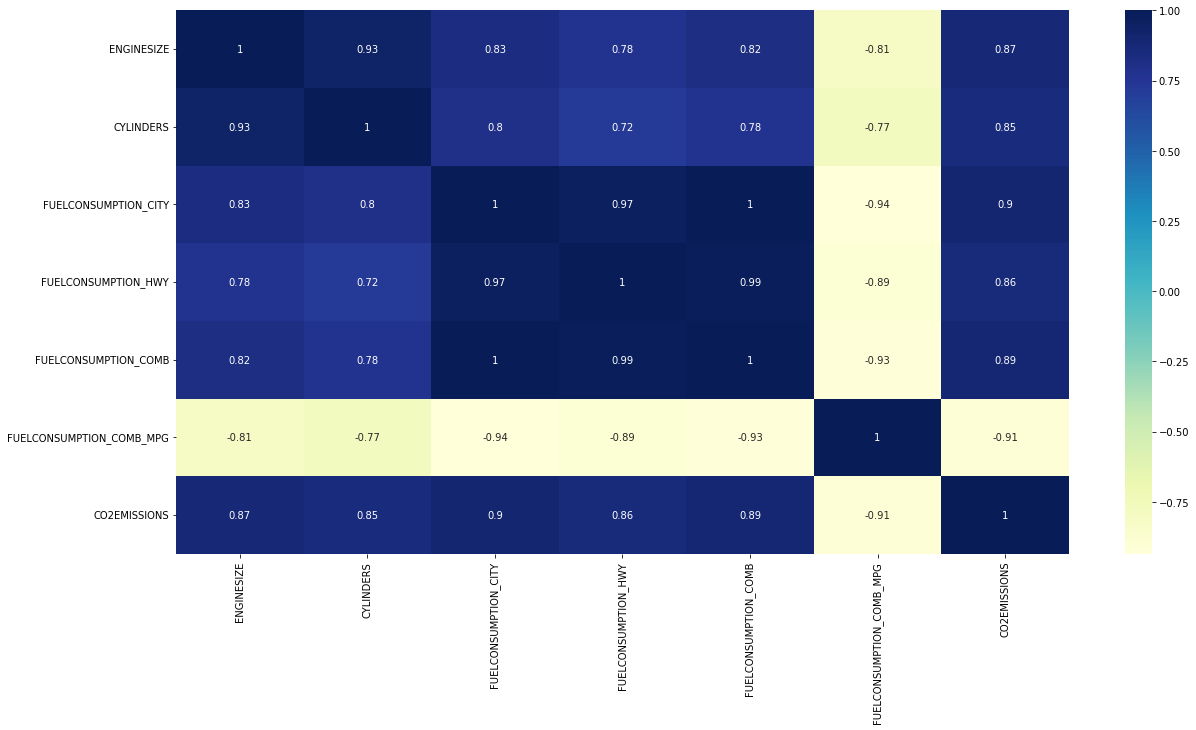

In [52]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(df_heat.corr(),cmap="YlGnBu", annot=True)

**Nhận xét**: Nhìn chung, mối liên hệ giữa các thuộc tính có sự tương quan cao
* Độ tương quan >= 0.9: `ENGINESIZE` & `CYLINDERS`, `FUELCONSUMPTION_CITY` & `CO2EMISSIONS`, `FUELCONSUMPTION_HWY` & `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY` & `FUELCONSUMPTION_COMB`, `FUELCONSUMPTION_COMB_MPG` & `FUELCONSUMPTION_COMB`, `FUELCONSUMPTION_CITY` & `CO2EMISSIONS`


<font size=7>3.</font>

**Pairplot**

<font size=7>4.</font>

In [61]:
#tách dữ liệu thành 2 phần
train,test=train_test_split(df, test_size=0.3, random_state=42)

* Cấu trúc của tập dữ liệu train: 746 row & 13 col

In [64]:
train.shape

(746, 13)

* Những thống kê cơ bản

In [62]:
train.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,746.0,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000,746.000000
mean,2014.0,3.349464,5.789544,13.343164,9.501743,11.618901,26.339142,256.926273
std,0.0,1.414510,1.802295,4.100737,2.805332,3.491125,7.359165,63.300169
min,2014.0,1.000000,3.000000,4.700000,4.900000,4.800000,11.000000,110.000000
25%,2014.0,2.000000,4.000000,10.300000,7.500000,9.100000,21.000000,209.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.375000,8.000000,15.700000,10.900000,13.400000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,59.000000,488.000000


* Phân tích mỗi quan hệ tương quan giữa biến phụ thuộc `CO2EMISSIONS` và các biến độc lập `ENGINESIZE`, `CYLINDERS`, `FUELCONSUMPTION_CITY`, `FUELCONSUMPTION_HWY`, `FUELCONSUMPTION_COMB`, `FUELCONSUMPTION_COMB_MPG`

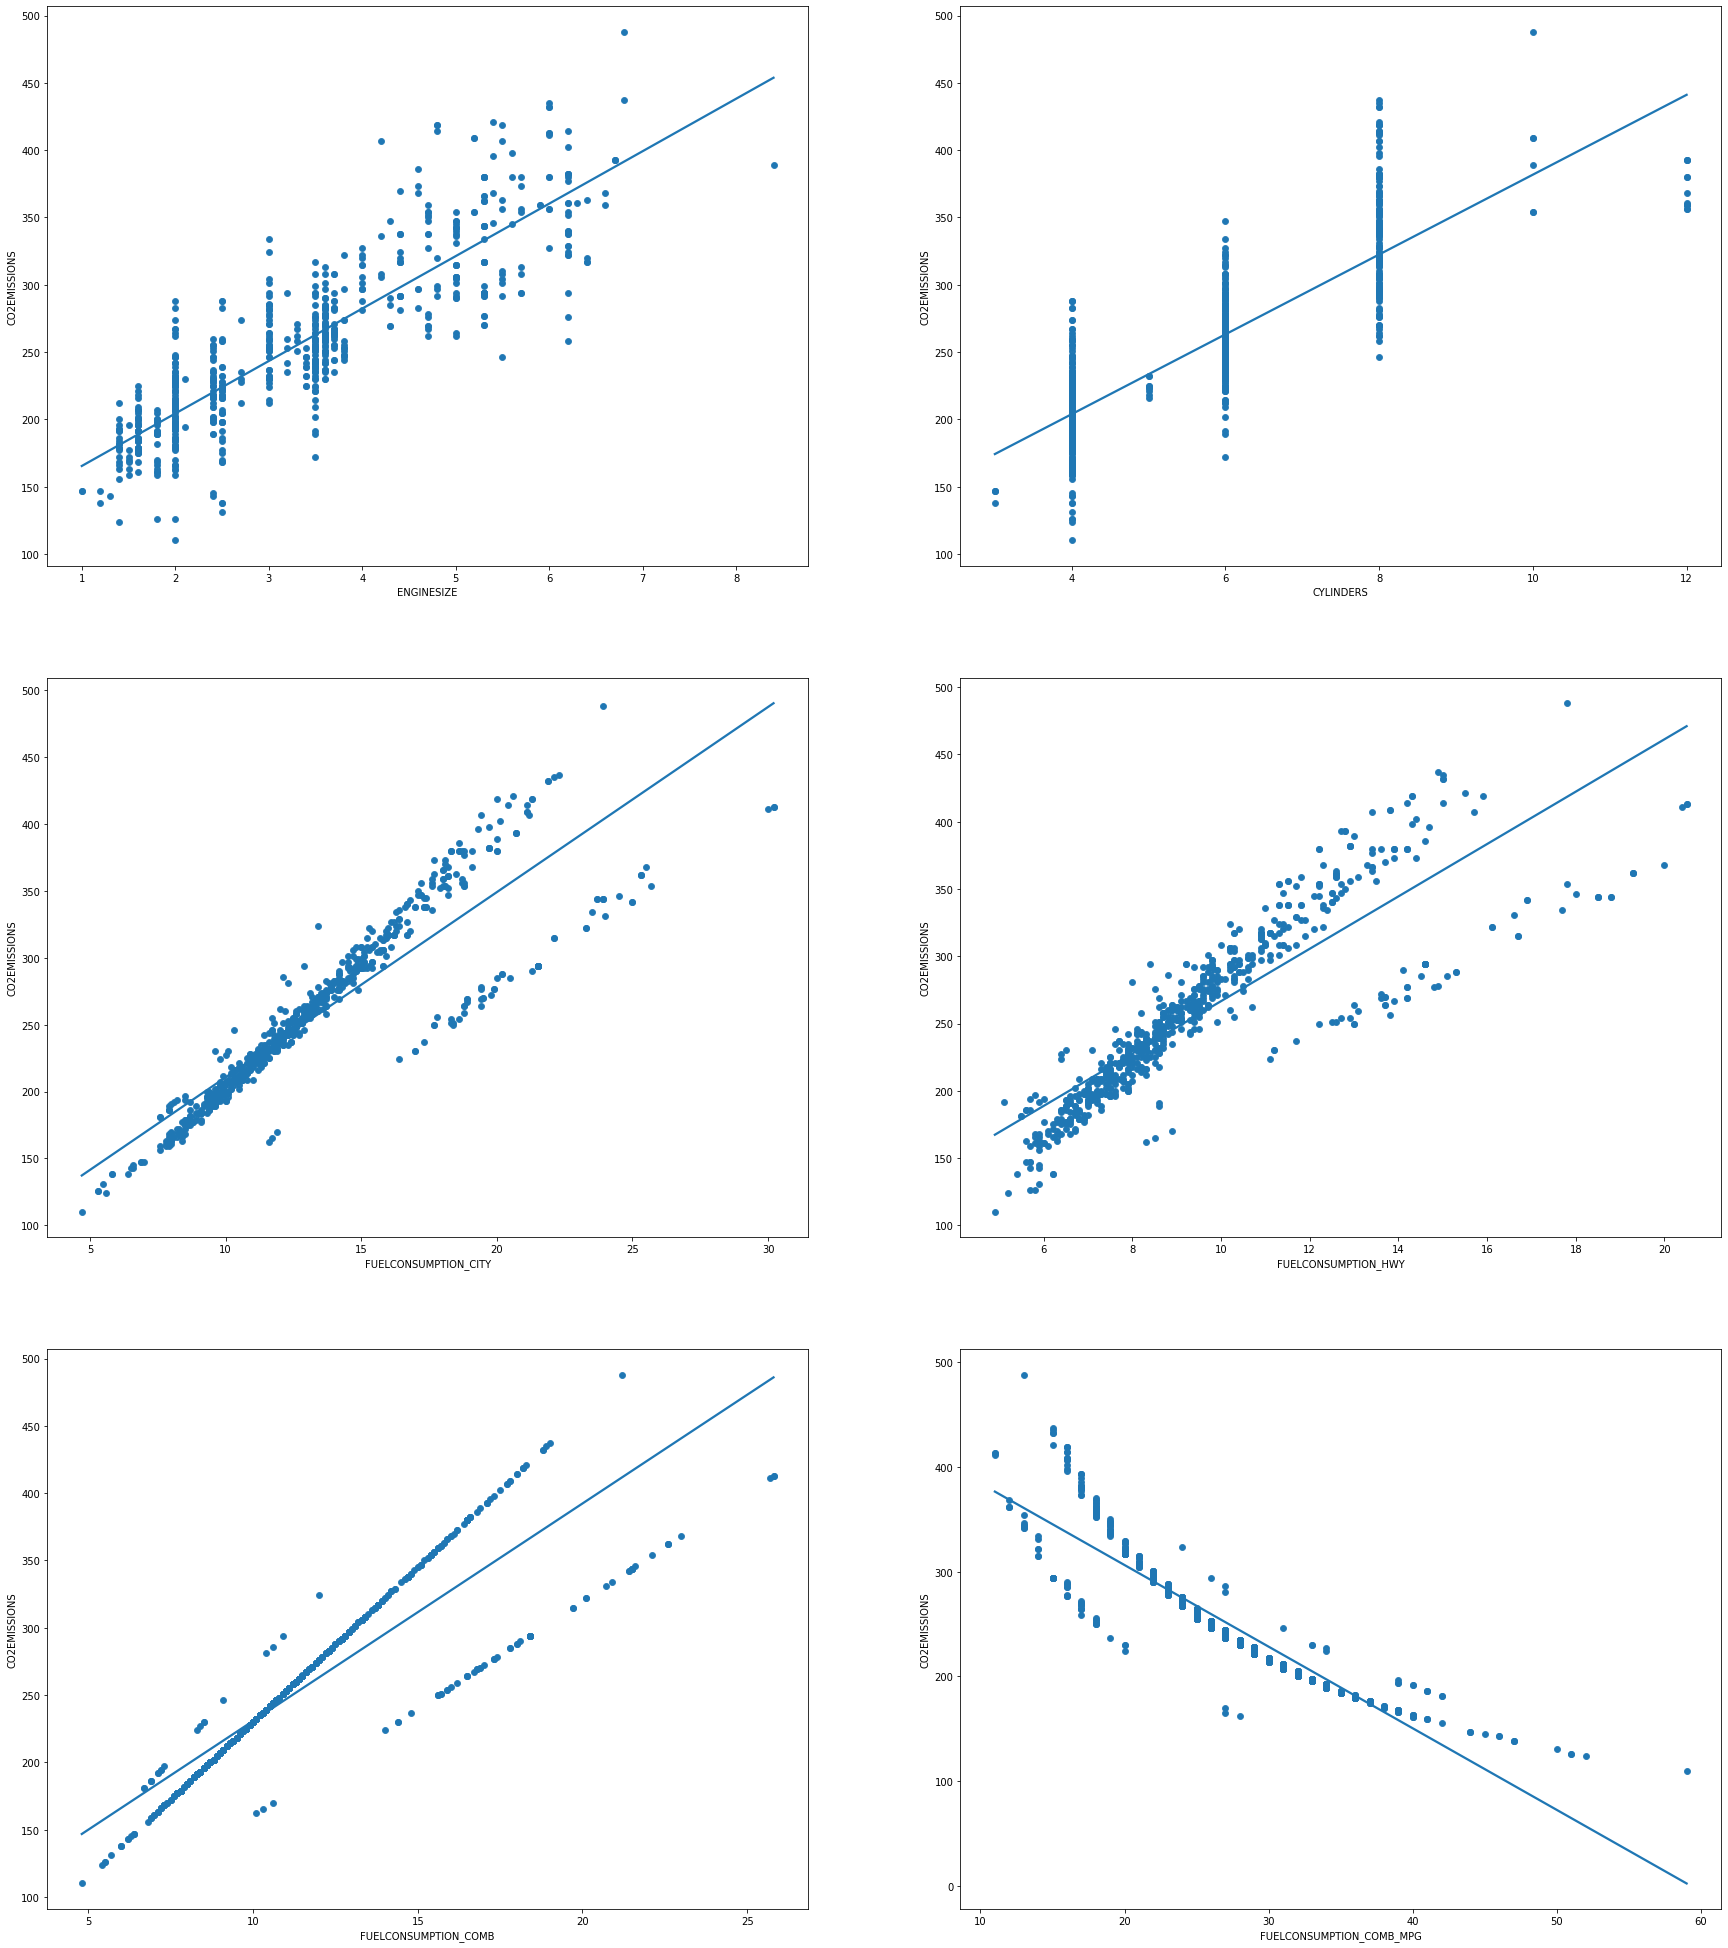

In [75]:
fig, ax = plt.subplots(3,2,figsize=(30,35))
sns.scatterplot(data=train, x="ENGINESIZE", y="CO2EMISSIONS", ax=ax[0,0])
sns.regplot(data=train, x="ENGINESIZE", y="CO2EMISSIONS", ax=ax[0,0], ci=None)
sns.scatterplot(data=train, x="CYLINDERS", y="CO2EMISSIONS", ax=ax[0,1])
sns.regplot(data=train,  x="CYLINDERS", y="CO2EMISSIONS", ax=ax[0,1], ci=None)
sns.scatterplot(data=train, x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", ax=ax[1,0])
sns.regplot(data=train,  x="FUELCONSUMPTION_CITY", y="CO2EMISSIONS", ax=ax[1,0], ci=None)
sns.scatterplot(data=train, x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", ax=ax[1,1])
sns.regplot(data=train,  x="FUELCONSUMPTION_HWY", y="CO2EMISSIONS", ax=ax[1,1], ci=None)
sns.scatterplot(data=train, x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", ax=ax[2,0])
sns.regplot(data=train,   x="FUELCONSUMPTION_COMB", y="CO2EMISSIONS", ax=ax[2,0], ci=None)
sns.scatterplot(data=train, x="FUELCONSUMPTION_COMB_MPG", y="CO2EMISSIONS", ax=ax[2,1])
sns.regplot(data=train, x="FUELCONSUMPTION_COMB_MPG", y="CO2EMISSIONS", ax=ax[2,1], ci=None)
plt.show()

* Trực quan mức độ tương quan giữa các trường dữ liệu của tập train

<AxesSubplot:>

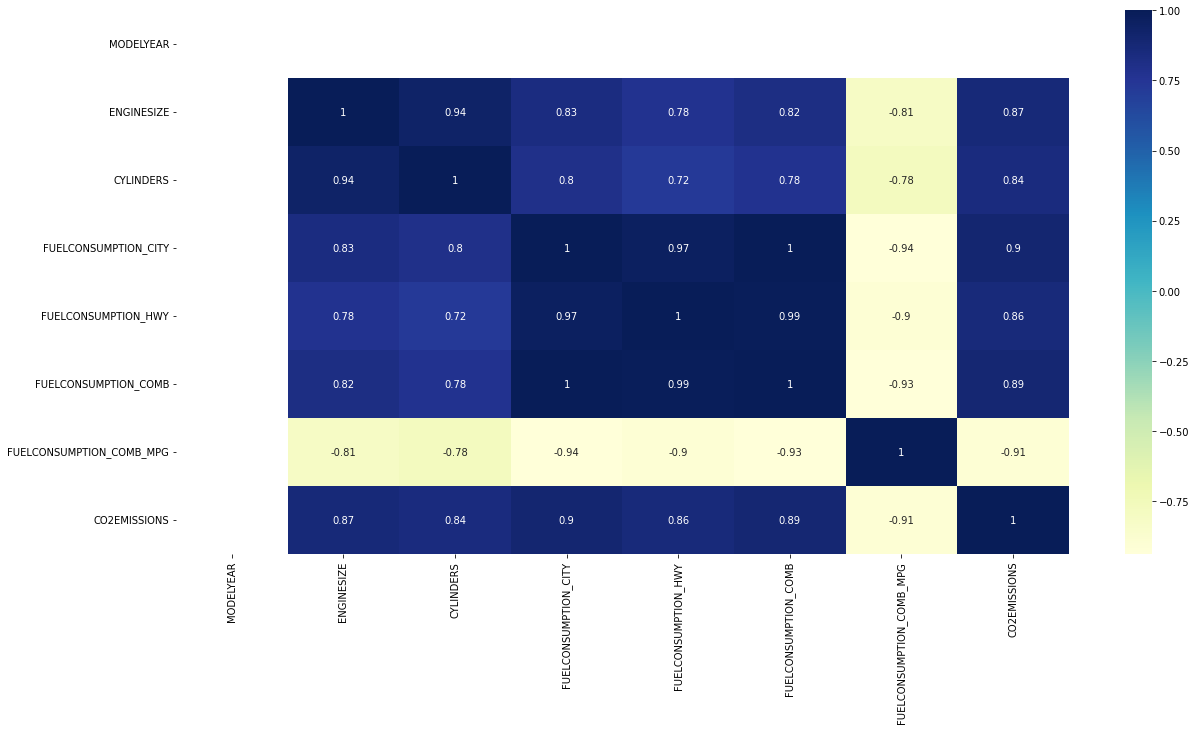

In [73]:
fig = plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap="YlGnBu", annot=True)

**Nhận xét**: 
* `CO2EMISSIONS` & `ENGINESIZE`: có độ tương quan cao, 0.87
* `CO2EMISSIONS` & `CYLINDERS`: có độ tương quan cao, 0.84
* `CO2EMISSIONS` & `FUELCONSUMPTION_CITY`: có độ tương quan cao, 0.9
* `CO2EMISSIONS` & `FUELCONSUMPTION_HWY`: có độ tương quan cao, 0.86
* `CO2EMISSIONS` & `FUELCONSUMPTION_COMB`: có độ tương quan cao, 0.89
* `CO2EMISSIONS` & `FUELCONSUMPTION_COMB_MPG`: có độ tương quan thấp, -0.91

* Sử dụng OLS ước lượng các hệ số

In [84]:
x_test = test['CO2EMISSIONS']
X_test = test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
y_train=train['CO2EMISSIONS']
X_train=train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','FUELCONSUMPTION_COMB_MPG']]
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           CO2EMISSIONS   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.882
Method:                 Least Squares   F-statistic:                     929.4
Date:                Sat, 22 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:37:35   Log-Likelihood:                -3352.1
No. Observations:                 746   AIC:                             6718.
Df Residuals:                     739   BIC:                             6750.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      256.9961     15.883     16.181      0.000     225.815     288.177
ENGINESIZE                   9.3841      1.769      5.304      0.000       5.910      12.858
CYLINDERS                    6.7241      1.296      5.189      0.000       4.180       9.268
FUELCONSUMPTION_CITY       -14.7308     15.519     -0.949      0.343     -45.196      15.735
FUELCONSUMPTION_HWY         -6.9602     12.782     -0.545      0.586     -32.053      18.133
FUELCONSUMPTION_COMB        25.4101     28.192      0.901      0.368     -29.937      80.757
FUELCONSUMPTION_COMB_MPG    -3.9097      0.318    -12.293      0.000      -4.534      -3.285
==============================================================================
Omnibus:                       51.058   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.753
Skew:                          -0.056   Prob(JB):                     2.33e-47
Kurtosis:                       5.626   Cond. No.                     1.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Nhận xét**: 
* Quan sát thấy giá trị R2 = 0.883, giá trị đủ lớn cho thấy được mô hình đủ tốt
* F-value = 929.4 và p-value < 0.05: 
    * H0: Tất cả hệ số hồi quy bằng 0
    * H1: Có ít nhất 1 hệ số hồi quy khác 0 <br>
=> Ta nhận thấy: Chấp nhận H0

* Ta có được mô hình: Gọi Y là giá trị `CO2EMISSIONS`, X1: `ENGINESIZE`, X2: `CYLINDERS`, X3: `FUELCONSUMPTION_CITY`, X4: `FUELCONSUMPTION_HWY`, X5: `FUELCONSUMPTION_COMB`, X6: `FUELCONSUMPTION_COMB_MPG` <br>
* Xét T-test và p-value:
    * `ENGINESIZE` & `CYLINDERS` có p-value < 0.05: 2 thành phần có ý nghĩa khi dự đoán giá trị CO2
    * `FUELCONSUMPTION_CITY` & `FUELCONSUMPTION_HWY` & `FUELCONSUMPTION_COMB` có p-value > 0.05: Không có ý nghĩa khi dự đoán giá trị CO2
* y = 256.9961 + 9.3841*X1 + 6.7241*X2 - 14.7308*X3 -6.9602*X4 + 25.4101*X5 - 3.9097*X6

* **Thực hiện dự đoán**

In [92]:
X_train_1=X_train.drop('const', axis=1)
regressor = LinearRegression()
regressor.fit(X_train_1, y_train)

LinearRegression()

* Áp dụng mô hình vừa học được lên tập test để nhận giá trị dự báo

In [96]:
X_test

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG
732,4.7,8,15.4,10.4,13.2,21
657,3.5,6,11.3,7.6,9.6,29
168,3.6,6,15.1,9.9,12.8,22
86,3.0,6,11.4,7.3,9.6,29
411,2.0,4,10.5,7.1,9.0,31
...,...,...,...,...,...,...
82,2.0,4,10.4,6.7,8.7,32
436,5.3,8,23.5,17.7,20.9,14
457,6.2,8,16.3,11.4,14.1,20
497,1.5,4,8.3,6.9,7.7,37


In [94]:
y_pred = regressor.predict(X_test)
y_pred

array([308.96275897, 241.38417423, 279.01768813, 237.30710931,
       206.05910132, 251.73533465, 308.10320687, 295.66301513,
       312.97476717, 309.91496787, 290.45660534, 375.28397137,
       260.7734979 , 257.12339841, 269.68146052, 264.0749104 ,
       218.90278987, 251.85412295, 184.66357758, 311.57480644,
       324.51338028, 208.8026167 , 264.77885163, 249.32117218,
       270.48310147, 197.69251835, 208.14721471, 177.60658623,
       311.52559105, 254.76112583, 373.30688411, 200.29577308,
       209.57967634, 328.58106349, 237.03081182, 288.0214543 ,
       278.99256511, 380.85545075, 198.79227643, 207.61273929,
       152.06418299, 177.20144043, 180.14026806, 210.0551261 ,
       287.15738387, 206.27180422, 249.0078027 , 270.92147924,
       182.90554817, 355.19741541, 315.79650609, 289.20628697,
       216.85388677, 277.94329519, 271.46120191, 320.03841298,
       375.1858401 , 324.2117704 , 184.22539467, 288.8901009 ,
       304.16363326, 277.39929596, 293.21688031, 258.02

* Tương ứng với mỗi dòng trong X_test, ta sẽ thu được giá trị dự đoán là mỗi phần tử trong mảng trên